In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
dx = 5
dy = 5

Lx = 100
Ly = 100

class node:
    def __init__(self):
        
        self.node_pos = None
        self.Cell_size_x = 5
        self.Cell_size_y = 5
        self.grid_face = None
        self.node_type = None 
        self.Gx = None # Location along the x axis
        self.Gx_ = None # Location along the x axis
        
        self.Gy = None # Location along the y axis
        self.edge_color = "blue"

        # self.edge_node_pos = []

In [119]:
mesh = np.array([[node() for x in range(int(Lx/dx))] for y in range(int(Ly/dy))])
mesh.shape

(20, 20)

In [120]:
# Equidistant mesh
x_val = 0
y_val = 0

# the origin of the x and y axis is on the bottom left
for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]
        cell.Gx = x_val
        cell.Gy = y_val

        x_val += cell.Cell_size_x
    x_val = 0
    y_val += cell.Cell_size_y

In [91]:
x, y = 4, 0
mesh[x][y].Gx, mesh[x][y].Gy

(0, 20)

In [107]:
plot_size_x = 0
plot_size_y = 0

run_x = True

for y in range(mesh.shape[0]):
    if run_x == True:
        for x in range(mesh.shape[1]):
            plot_size_x += mesh[y][x].Cell_size_x
    run_x = False

    plot_size_y += mesh[y][x].Cell_size_y

In [93]:
plot_size_x, plot_size_y

(100, 100)

In [109]:
def stretch_one_point(arr, index, percent):
    arr = arr.copy()
    total = sum(arr)

    # Stretch the chosen point
    increase = arr[index] * (percent / 100.0)
    arr[index] += increase

    # Distribute decrease across other elements
    decrease = increase / (len(arr) - 1)
    for i in range(len(arr)):
        if i != index:
            arr[i] -= decrease

    # Ensure sum is preserved (floating-point safe)
    diff = total - sum(arr)
    arr[index] += diff

    return arr


# Example usage
x_axis = [5, 5, 5, 5, 5]
result = stretch_one_point(x_axis, index=-1, percent=-90)  # Stretch 3rd element by {percent}%
print(result)
print("Sum:", sum(result))

[6.125, 6.125, 6.125, 6.125, 0.5]
Sum: 25.0


In [132]:
degrade = -90

for y in range(mesh.shape[0]):
    # Extract current row cell sizes
    x_array_size = [mesh[y][x].Cell_size_x for x in range(mesh.shape[1])]

    # Stretch chosen index
    stretched_array_size = stretch_one_point(x_array_size, index=-1, percent=degrade)

    # Assign back the new sizes
    for x in range(mesh.shape[1]):
        mesh[y][x].Cell_size_x = stretched_array_size[x]

    # Recompute centers properly
    current_x = 0
    for x in range(mesh.shape[1]):
        mesh[y][x].Gx = current_x + mesh[y][x].Cell_size_x / 2.0
        current_x += mesh[y][x].Cell_size_x

In [133]:
print([mesh[0][i].Cell_size_x for i in range(mesh.shape[1])])
print([mesh[0][i].Gx for i in range(mesh.shape[1])])

[5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 5.262894736842106, 0.005000000000030544]
[2.631447368421053, 7.894342105263158, 13.157236842105265, 18.42013157894737, 23.683026315789476, 28.945921052631583, 34.20881578947369, 39.47171052631579, 44.734605263157896, 49.9975, 55.26039473684211, 60.523289473684216, 65.78618421052633, 71.04907894736843, 76.31197368421053, 81.57486842105263, 86.83776315789473, 92.10065789473683, 97.36355263157893, 99.99749999999999]


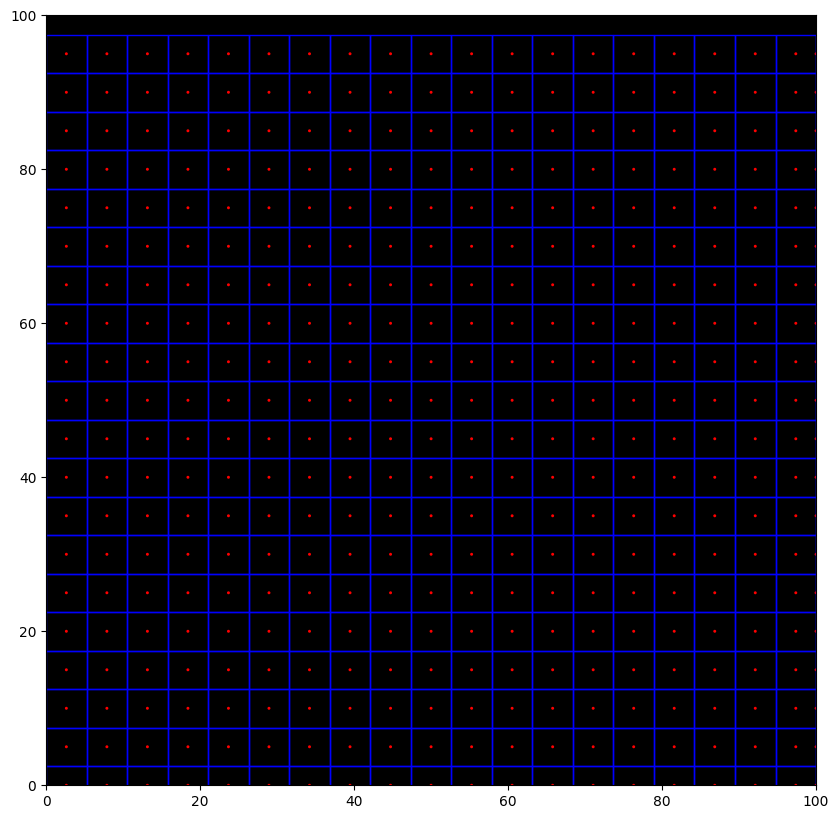

In [136]:
# Recompute plot size after stretching
plot_size_x = sum([mesh[0][x].Cell_size_x for x in range(mesh.shape[1])])
plot_size_y = sum([mesh[y][0].Cell_size_y for y in range(mesh.shape[0])])

fig, ax = plt.subplots(figsize=(10, 10))

canvas = np.ones((int(plot_size_y), int(plot_size_x)))
ax.imshow(canvas, origin='lower', cmap='gray',
          extent=[0, plot_size_x, 0, plot_size_y])

for y in range(mesh.shape[0]):
    for x in range(mesh.shape[1]):
        cell = mesh[y][x]

        # Circle at the center
        circle = plt.Circle((cell.Gx, cell.Gy), 0.1, color='red', fill=False)
        ax.add_patch(circle)

        # Rectangle around the cell
        rect = plt.Rectangle(
            (cell.Gx - cell.Cell_size_x/2, cell.Gy - cell.Cell_size_y/2),
            cell.Cell_size_x, cell.Cell_size_y,
            linewidth=1, edgecolor=cell.edge_color, facecolor='none'
        )
        ax.add_patch(rect)

plt.show()